In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import isnan

In [2]:
def Load_Data(path_dir):
    list_text = os.listdir(path=path_dir)
    text_array = ''
    for text in list_text:
        with open(path_dir + text, 'r') as f:
            text_array+= f.readline() + '\n'
    text_array = text_array.replace('\ufeff', '')
    list_of_files = text_array.split('\n')
    for i in range(len(list_of_files)):
        list_of_files[i] = list_of_files[i].split('\t')
    text_tmp = []
    for i in range(len(list_of_files)):
        if list_of_files[i] != ['']:
            text_tmp.append(list_of_files[i])
    return text_tmp

In [3]:
def ParseData(data):
    list_of_sites, body_array, values = [],[],[];
    for i in range(len(data)):
        body_array.append([])
        for j in range(len(data[i])):
            if j == 0:
                list_of_sites.append(data[i][j])
            elif j == len(data[i])-1:
                values.append(int(data[i][j]))
            else:
                if j != 4:
                    if data[i][j] == 'null':
                        body_array[i].append(0)
                    elif data[i][j] == 'true':
                        body_array[i].append(1)
                    elif data[i][j] == 'false':
                        if j == 2:
                            body_array[i].append(0)
                        else:
                            body_array[i].append(-1)
                    else:
        #                 print(text_array[i][j])
                        body_array[i].append(float(data[i][j]))
    return list_of_sites, np.array(body_array), np.array(values)

In [4]:
colomns_name = ["DNSSEC","Домен","Протокол","Тело img","Опечатки/Слова","Форма","Поз.ссылки/Нег.ссылки","Ссылки стилистики","Опечатки","Слова","Значение"]

In [5]:
def correct_data(data, tmp):
    return np.concatenate((data.T,np.array([tmp])),axis=0).T

In [6]:
list_of_sites_train, data_train, val_train = ParseData(Load_Data('New_train/'))
list_of_sites_test, data_test, val_test = ParseData(Load_Data('New_test/'))
list_of_sites_val, data_val,val_val = ParseData(Load_Data('New_val/'))

In [7]:
df = pd.DataFrame(correct_data(data_train, val_train), columns=colomns_name, index=list_of_sites_train)

In [8]:
df.head(10)

,DNSSEC,Домен,Протокол,Тело img,Опечатки/Слова,Форма,Поз.ссылки/Нег.ссылки,Ссылки стилистики,Опечатки,Слова,Значение
http://online-kunden-saprkasse.com/Sparkasse/,1.0,0.0,-1.0,1.0,0.111111,-1.0,0.00,0.200000,4.0,36.0,1.0
https://thankful-impartial-verse.glitch.me/,1.0,0.0,1.0,1.0,-1.000000,-1.0,-1.00,-1.000000,0.0,0.0,1.0
https://solentbasketball.co.uk/,1.0,1.0,1.0,1.0,0.000000,1.0,22.50,13.000000,0.0,92.0,0.0
https://essayjob.com/,1.0,1.0,1.0,1.0,0.000000,1.0,11.00,1.000000,0.0,54.0,0.0
https://www.tenshoku-hanashi.com/,1.0,1.0,1.0,1.0,-1.000000,1.0,0.00,3.500000,0.0,0.0,0.0
https://ministeriumfuerinternet.de/,1.0,1.0,1.0,1.0,0.000000,1.0,-1.00,1.500000,0.0,3.0,0.0
https://violetraven.co.uk/,1.0,1.0,1.0,1.0,0.000000,1.0,2.25,1.000000,0.0,87.0,0.0
https://satnt-fra.netlify.app/PortailAS/appmanager/-w2axeyz7vbx1ptc/assure?_nfpbhsh=true&_pagef1Label=as_1c_creation_immediate_page&c_ek,0.0,0.0,1.0,1.0,0.148148,1.0,-1.00,3.000000,4.0,27.0,1.0
http://kunden-saprkasse.com/DEE/,1.0,0.0,-1.0,1.0,0.111111,-1.0,0.00,0.200000,4.0,36.0,1.0
http://www.vigier-cuisine.fr/wp-admin/alert?a=settings,1.0,0.0,-1.0,1.0,0.053571,-1.0,0.00,1.272727,3.0,56.0,1.0


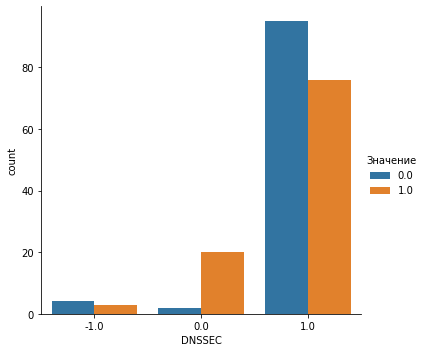

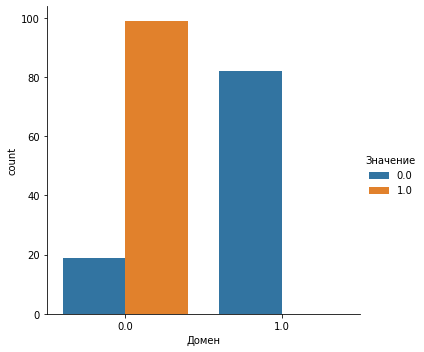

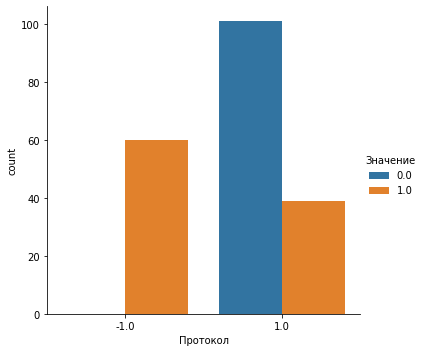

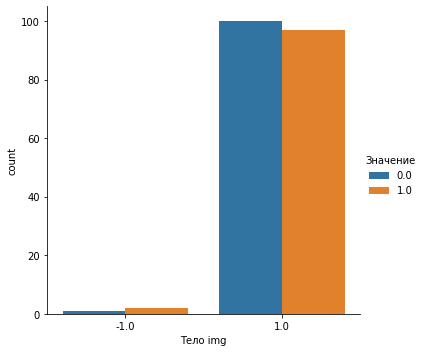

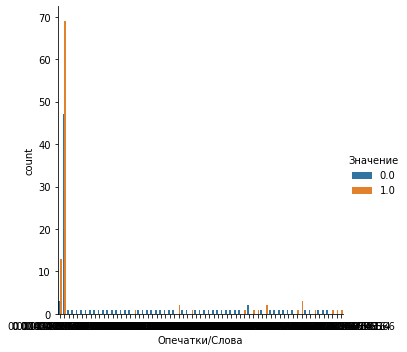

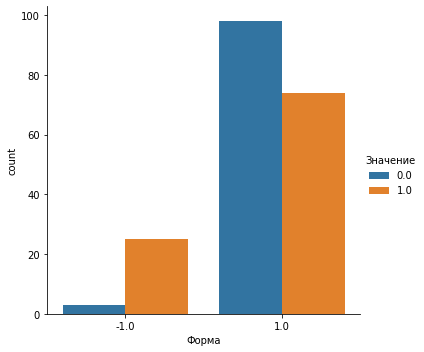

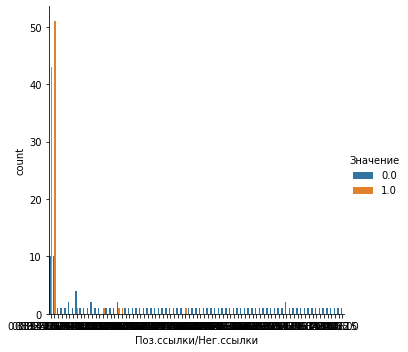

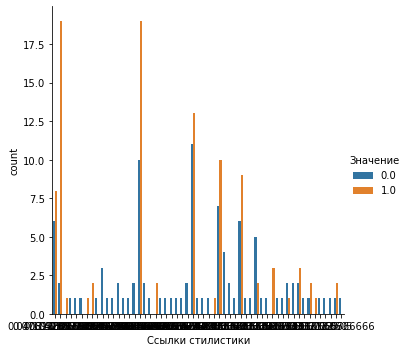

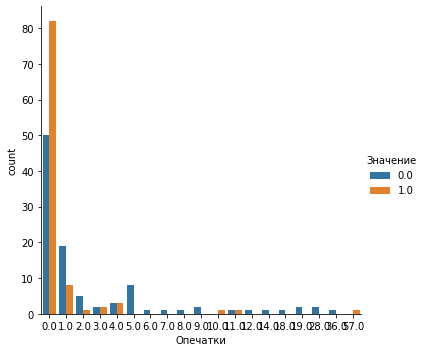

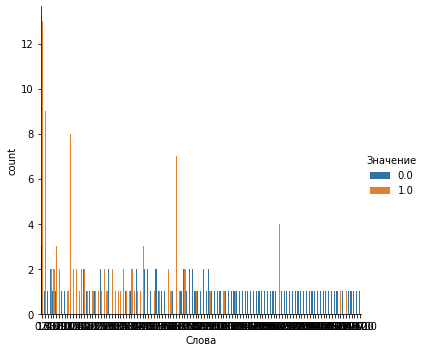

In [9]:
for i in range(len(colomns_name)-1):
    f = sns.catplot(x=colomns_name[i], data=df, kind='count', hue='Значение')

In [10]:
def get_color_array(array, f):
    return ['red' if f(array[i]) > 0.5 else 'blue' for i in range(len(array))]

In [11]:
val_train_color = get_color_array(val_train, lambda x: x)
val_test_color = get_color_array(val_test, lambda x: x)

In [12]:
def get_graph(data_array, color_array):
    ax_shape = data_array.shape[1];
#     print(ax_shape)
    f_val, ax = plt.subplots(ax_shape, ax_shape, sharey=True)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i][j].scatter(data_array.T[i],data_array.T[j], c=color_array)

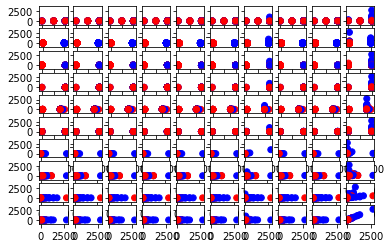

In [13]:
get_graph(data_train, val_train_color)

In [14]:
from sklearn.manifold import TSNE

In [15]:
model_to2D = TSNE(learning_rate=100)
transform = model_to2D.fit_transform(data_train)
x = transform[:,0]
y = transform[:,1]

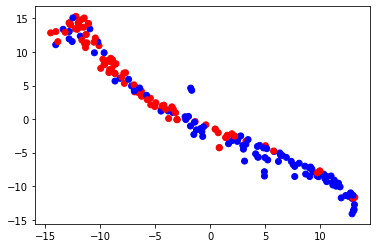

In [16]:
plt.scatter(x, y, c=val_train_color)
plt.show()

In [17]:
import json

In [18]:
def get_data_to_json (array_data, array_val):
    tmp = []
    for i in range(len(array_data)):
        tmp.append({'input': array_data[i].tolist(), 'output':[array_val[i].tolist()]})
    return tmp

In [19]:
mas_train_json = get_data_to_json(data_train, val_train)
mas_test_json = get_data_to_json(data_test, val_test)
mas_val_json = get_data_to_json(data_val, val_val)

In [20]:
with open('Data_json/train.json', 'w') as f:
    json.dump(mas_train_json, f)
with open('Data_json/test.json', 'w') as f:
    json.dump(mas_test_json, f)
with open('Data_json/val.json', 'w') as f:
    json.dump(mas_val_json, f)